<a href="https://colab.research.google.com/github/josepefg/analises-de-dados/blob/master/airbnb/Airbnb_Sydney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.linkedin.com/in/josepegerent"> <img border="0" alt="Linkedin" src="https://img.shields.io/badge/Autor-josepefg-red.svg"> </a>
# **Análise do Airbnb**  
Sydney
Airbnb

# **Obtenção dos dados**  

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/australia/nsw/sydney/2020-06-11/visualisations/listings.csv")

# **Análise dos dados**

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,64,2,196,2020-03-13,1.53,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14314,2,526,2019-09-22,4.37,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,471,5,2,2019-01-02,0.04,2,173
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,3,76,2020-01-03,0.65,1,0
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81927,151.23652,Entire home/apt,140,2,280,2020-04-23,2.43,1,267


## Quais as dimensões do dataset?

In [4]:
df.shape

(36901, 16)

## Quais os tipos das colunas?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36901 entries, 0 to 36900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36901 non-null  int64  
 1   name                            36889 non-null  object 
 2   host_id                         36901 non-null  int64  
 3   host_name                       36894 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36901 non-null  object 
 6   latitude                        36901 non-null  float64
 7   longitude                       36901 non-null  float64
 8   room_type                       36901 non-null  object 
 9   price                           36901 non-null  int64  
 10  minimum_nights                  36901 non-null  int64  
 11  number_of_reviews               36901 non-null  int64  
 12  last_review                     

Aqui já podemos perceber que a coluna neighbourhood_group não tem nenhum valor preenchido, então já é uma candidata a ser excluída.

## Qual a porcentagem de valores ausentes de cada coluna?

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.278394
last_review                       0.278394
name                              0.000325
host_name                         0.000190
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## Como estão distribuídas as variáveis?

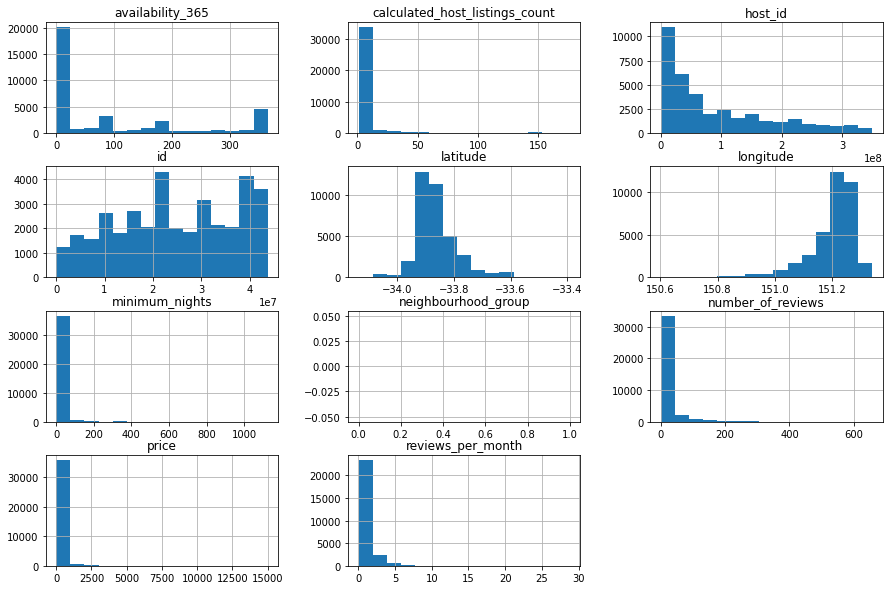

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

## Há outliers nesse dataset?

### Resumo estatístico.

In [8]:
# resumo estatístico dos dados numéricos
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.690100e+04,3.690100e+04,0.0,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,26628.000000,36901.000000,36901.000000
mean,2.453288e+07,9.131863e+07,NaN,-33.863215,151.198786,227.003333,6.106257,14.866995,0.784623,7.252134,95.462697
std,1.228760e+07,9.191494e+07,NaN,0.072964,0.088700,443.456850,27.658358,36.144464,1.172487,22.746438,129.994717
min,1.115600e+04,1.409300e+04,NaN,-34.135590,150.601470,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.499574e+07,1.828597e+07,NaN,-33.899450,151.175530,79.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,2.379250e+07,5.116167e+07,NaN,-33.882000,151.213460,130.000000,2.000000,2.000000,0.300000,1.000000,0.000000
75%,3.577880e+07,1.506891e+08,NaN,-33.829520,151.258910,220.000000,5.000000,11.000000,0.990000,2.000000,178.000000
max,4.373676e+07,3.492491e+08,NaN,-33.390750,151.339870,15000.000000,1125.000000,657.000000,28.820000,176.000000,365.000000


In [9]:
# estatística dos dados categóricos
df.describe(include=['O'])

,name,host_name,neighbourhood,room_type,last_review
count,36889,36894,36901,36901,26628
unique,35976,8205,38,4,1868
top,Home away from home,David,Sydney,Entire home/apt,2020-01-01
freq,22,344,9364,22641,447


### Boxplot das variáveis com outliers.

#### price

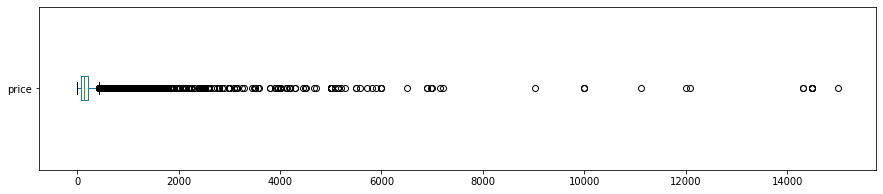


price: valores acima de 670.4601831614208:
1901 entradas
5.1516%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

price_1std = df.price.mean()+df.price.std()

# ver quantidade de valores acima de 1 desvio padrão para price
print("\nprice: valores acima de {}:".format(price_1std))
print("{} entradas".format(len(df[df.price > price_1std])))
print("{:.4f}%".format((len(df[df.price > price_1std]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### minimun_nights

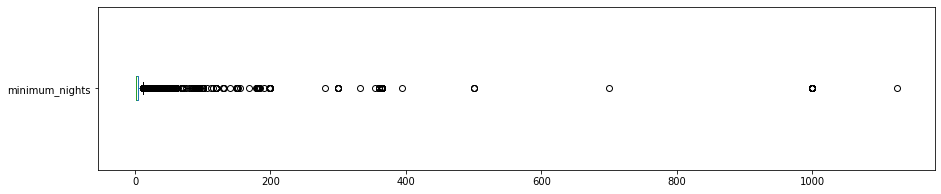

minimum_nights: valores acima de 33.76461550514746:
640 entradas
1.7344%


In [11]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

minimum_nights_1std = df.minimum_nights.mean()+df.minimum_nights.std()


# ver quantidade de valores acima de 1 desvio padrão para minimum_nights
print("minimum_nights: valores acima de {}:".format(minimum_nights_1std))
print("{} entradas".format(len(df[df.minimum_nights > minimum_nights_1std])))
print("{:.4f}%".format((len(df[df.minimum_nights > minimum_nights_1std]) / df.shape[0])*100))

#### number_of_reviews

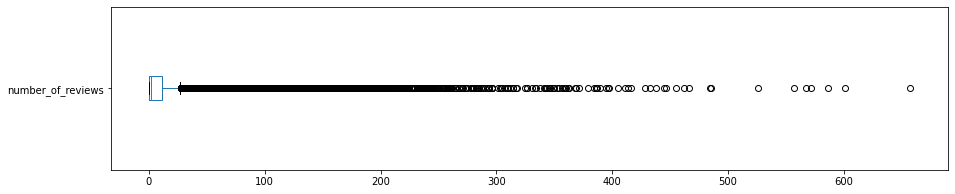

number_of_reviews: valores acima de 51.01145915993561:
3013 entradas
8.1651%


In [12]:
# number_of_reviews
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

number_of_reviews_1std = df.number_of_reviews.mean()+df.number_of_reviews.std()


# ver quantidade de valores acima de 1 desvio padrão para number_of_reviews
print("number_of_reviews: valores acima de {}:".format(number_of_reviews_1std))
print("{} entradas".format(len(df[df.number_of_reviews > number_of_reviews_1std])))
print("{:.4f}%".format((len(df[df.number_of_reviews > number_of_reviews_1std]) / df.shape[0])*100))

#### reviews_per_month

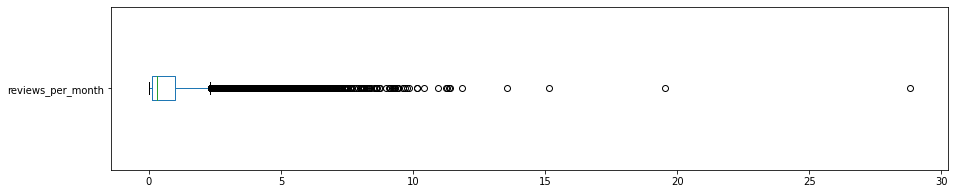

reviews_per_month: valores acima de 1.9571092439392546:
3243 entradas
8.7884%


In [13]:
# reviews_per_month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

reviews_per_month_1std = df.reviews_per_month.mean()+df.reviews_per_month.std()


# ver quantidade de valores acima de 1 desvio padrão para reviews_per_month
print("reviews_per_month: valores acima de {}:".format(reviews_per_month_1std))
print("{} entradas".format(len(df[df.reviews_per_month > reviews_per_month_1std])))
print("{:.4f}%".format((len(df[df.reviews_per_month > reviews_per_month_1std]) / df.shape[0])*100))

#### calculated_host_listings_count

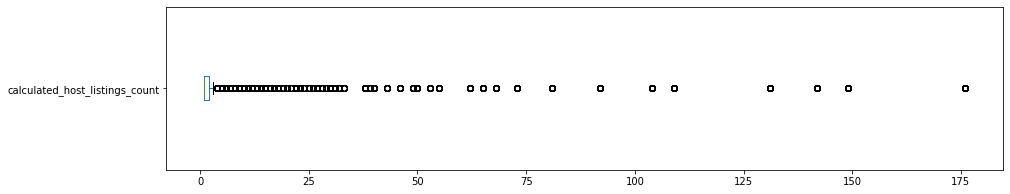

calculated_host_listings_count: valores acima de 29.998571996865515:
2139 entradas
5.7966%


In [14]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

calculated_host_listings_count_1std = df.calculated_host_listings_count.mean()+df.calculated_host_listings_count.std()


# ver quantidade de valores acima de 1 desvio padrão para calculated_host_listings_count
print("calculated_host_listings_count: valores acima de {}:".format(calculated_host_listings_count_1std))
print("{} entradas".format(len(df[df.calculated_host_listings_count > calculated_host_listings_count_1std])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > calculated_host_listings_count_1std]) / df.shape[0])*100))

#### availability_365

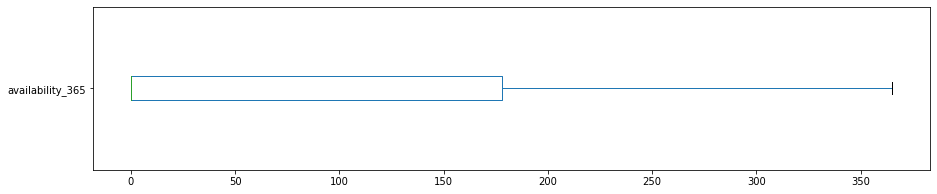

availability_365: valores acima de 225.45741406833608:
6953 entradas
18.8423%


In [15]:
# availability_365
df.availability_365.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

availability_365_1std = df.availability_365.mean()+df.availability_365.std()


# ver quantidade de valores acima de 1 desvio padrão para availability_365
print("availability_365: valores acima de {}:".format(availability_365_1std))
print("{} entradas".format(len(df[df.availability_365 > availability_365_1std])))
print("{:.4f}%".format((len(df[df.availability_365 > availability_365_1std]) / df.shape[0])*100))

### Histogramas sem outliers

In [0]:
# criando uma cópia do dataframe
df_cp = df.copy()

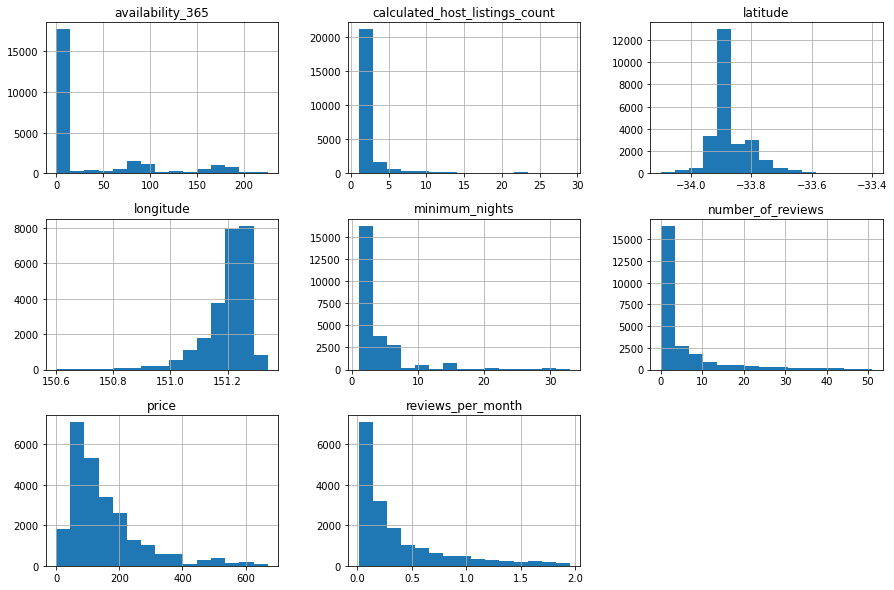

In [17]:
# remover os *outliers* em um novo DataFrame e colunas vazias
df_clean = df_cp.copy()
df_clean.drop(df_clean[df_clean.price > price_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > minimum_nights_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > number_of_reviews_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > reviews_per_month_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > calculated_host_listings_count_1std].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.availability_365 > availability_365_1std].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# remover "host_id" e "id" pois são variáveis sem valor estatístico
df_clean.drop('host_id', axis=1, inplace=True)
df_clean.drop('id', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

## Existe correlação entre as variáveis?

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

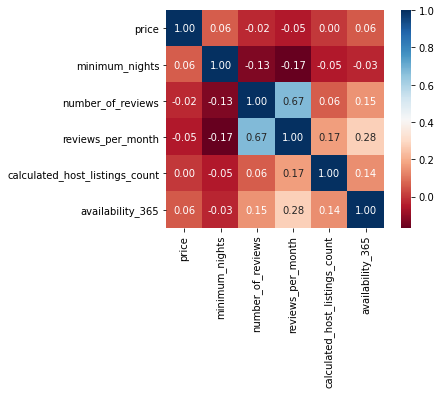

In [21]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Imóveis mais alugados

### Por tipo

In [22]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14157
Private room       10099
Shared room          533
Hotel room            44
Name: room_type, dtype: int64

In [23]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.570088
Private room       0.406677
Shared room        0.021463
Hotel room         0.001772
Name: room_type, dtype: float64

### Por Bairro

In [27]:
# mostrar a quantidade de imóvel por bairros
df_clean.neighbourhood.value_counts()[:10]

Sydney          5979
Waverley        3815
Randwick        2471
Warringah       1275
Manly           1161
Woollahra       1066
Marrickville     924
North Sydney     843
Rockdale         639
Leichhardt       600
Name: neighbourhood, dtype: int64

In [29]:
# mostrar a porcentagem de imóvel por bairro
(df_clean.neighbourhood.value_counts() / df_clean.shape[0])[:10]

Sydney          0.240768
Waverley        0.153626
Randwick        0.099505
Warringah       0.051343
Manly           0.046752
Woollahra       0.042927
Marrickville    0.037209
North Sydney    0.033947
Rockdale        0.025732
Leichhardt      0.024161
Name: neighbourhood, dtype: float64

## Preço médio do aluguel

### Por tipo

In [30]:
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]

room_type
Entire home/apt    206.949000
Hotel room         160.295455
Private room        81.660164
Shared room         55.075047
Name: price, dtype: float64

### Por bairro

In [31]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater           280.991304
Manly               210.450474
Hunters Hill        206.580645
Warringah           201.586667
Mosman              192.839416
Leichhardt          186.663333
Woollahra           176.833959
Sutherland Shire    175.017857
Waverley            172.927392
Willoughby          159.341954
Name: price, dtype: float64

In [33]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[-10:]

neighbourhood
City Of Kogarah    102.395973
Camden             102.148148
Ryde                99.729032
Campbelltown        99.000000
Holroyd             93.803279
Strathfield         93.448529
Canterbury          91.650794
Bankstown           90.493421
Blacktown           87.129944
Burwood             84.619632
Name: price, dtype: float64

In [42]:
df_clean.groupby(['neighbourhood']).agg({'price': ['mean', 'count']}).sort_values(('price', 'mean'), ascending=False)

price      
                        mean count
neighbourhood                     
Pittwater         280.991304   460
Manly             210.450474  1161
Hunters Hill      206.580645    31
Warringah         201.586667  1275
Mosman            192.839416   274
Leichhardt        186.663333   600
Woollahra         176.833959  1066
Sutherland Shire  175.017857   336
Waverley          172.927392  3815
Willoughby        159.341954   348
Lane Cove         157.995122   205
North Sydney      152.357058   843
Ku-Ring-Gai       151.683761   234
Randwick          144.403885  2471
Sydney            143.191169  5979
Canada Bay        142.563798   337
Penrith           123.723684    76
Marrickville      116.317100   924
Auburn            116.085616   292
Botany Bay        114.670082   488
Fairfield         111.173913    46
Rockdale          106.737089   639
Hornsby           106.620567   282
Liverpool         105.313253    83
The Hills Shire   104.977401   177
Ashfield          103.343612   227
Hurstville        102.643836   146
Parramatta        102.509642   363
City Of Kogarah   102.395973   149
Camden            102.148148    27
Ryde               99.729032   465
Campbelltown       99.000000    73
Holroyd            93.803279    61
Strathfield        93.448529   136
Canterbury         91.650794   252
Bankstown          90.493421   152
Blacktown          87.129944   177
Burwood            84.619632   163

## Mapa dos aluguéis

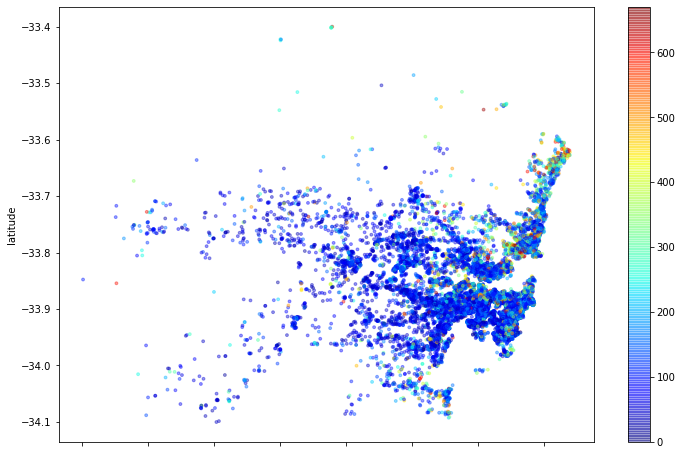

In [43]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# Conclusões